# **Diabetes Prediction Based on Diagnostic Measures**


* https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database


* ML algorithm used to classify diabetes


* Necessary metrics in plots


* EDA feature used for selection and necessary feature engineering and modeling parts are done

 Importing necessary libraries and the dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('diabetes.csv')

# Exploratory Data Analysis (EDA) to  understand the data and select relevant features

In [ ]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* The output above confirms that there are no missing values in the dataset
* All the features are in numeric format

# Below is the distribution of each feature using histograms

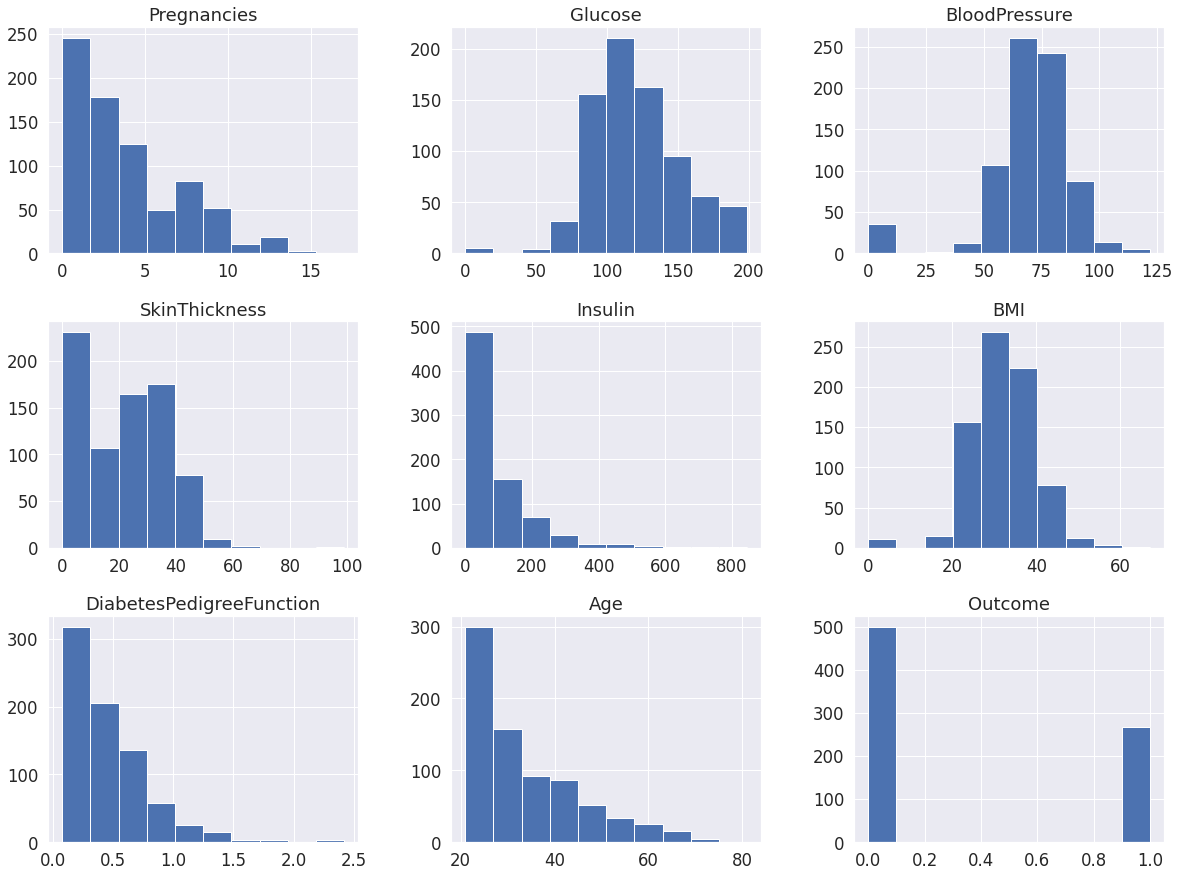

In [ ]:
data.hist(bins=10, figsize=(20,15))
plt.show()

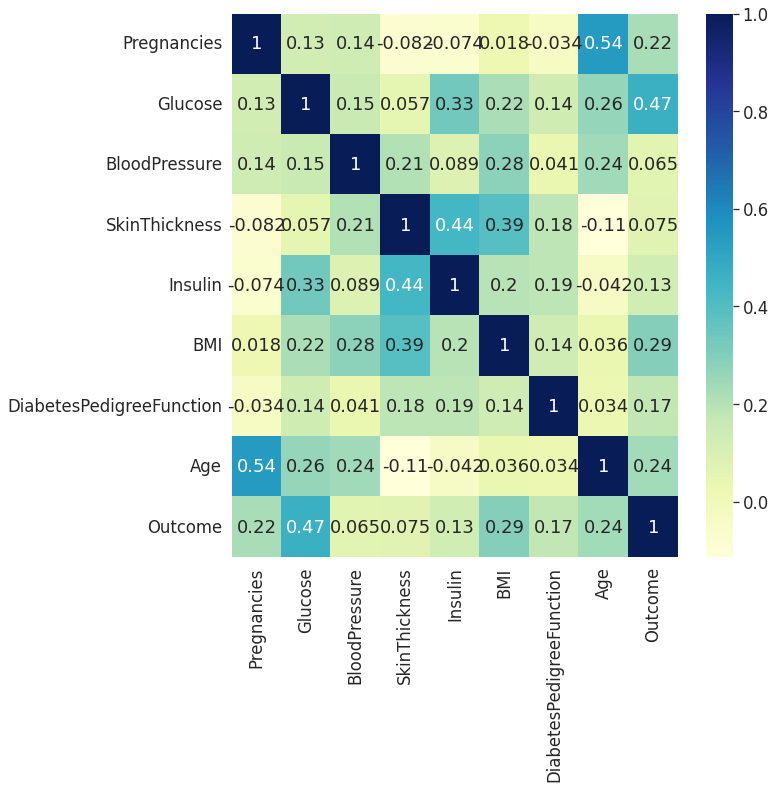

In [ ]:
corr_matrix = data.corr()
fig, ax = plt.subplots (figsize = (10, 10))
sns.heatmap(corr_matrix, annot = True, cmap= 'YlGnBu')
plt.show()

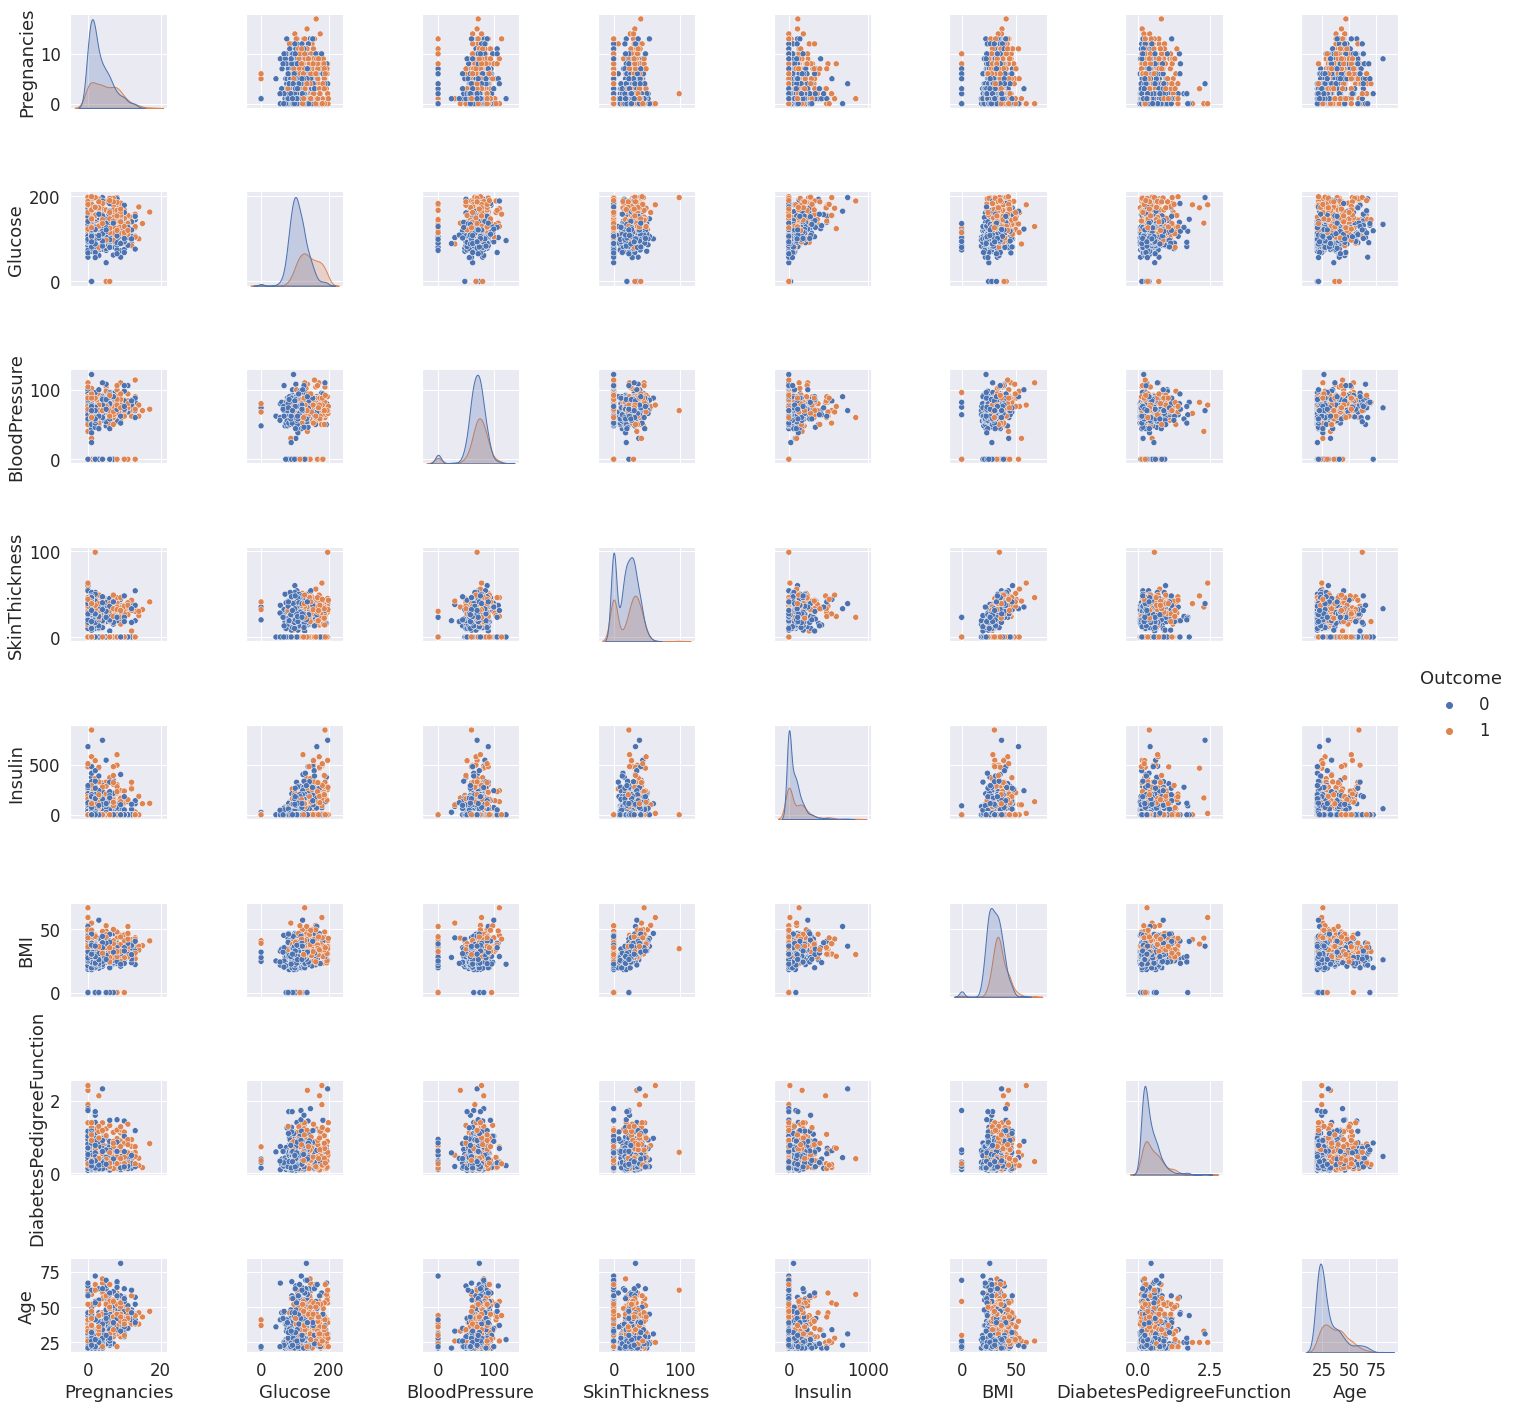

In [ ]:
sns.pairplot(data, hue='Outcome')
plt.show()

From the correlation matrix and pair plots, it shows that the glucose level has the highest correlation with the outcome
The following will be selected as our features for classification:
* Glucose
* BMI
* age
* insulin

**Feature scaling**

In [ ]:
X = data[['Glucose', 'BMI', 'Age', 'Insulin']]
y = data['Outcome']

In [ ]:
scaler = StandardScaler()            # feature scaling using the StandardScaler
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split (X_scaled, y, test_size = 0.3, random_state = 42)  # split the data into training and testing sets 

In [ ]:
models = [RandomForestClassifier(n_estimators=100, random_state=42),
          LogisticRegression(random_state=42),
          DecisionTreeClassifier(random_state=42),
          KNeighborsClassifier(n_neighbors=5),
          SVC(kernel='linear', probability=True, random_state=42)]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(type(model).__name__)
    print('Accuracy:', model.score(X_test, y_test))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('Classification Report:\n', classification_report(y_test, y_pred))
    print('ROC-AUC Score:', roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))


RandomForestClassifier
Accuracy: 0.7272727272727273
Confusion Matrix:
 [[75 24]
 [18 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.76      0.78        99
           1       0.61      0.67      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154

ROC-AUC Score: 0.797979797979798
LogisticRegression
Accuracy: 0.7532467532467533
Confusion Matrix:
 [[82 17]
 [21 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154

ROC-AUC Score: 0.7803489439853076
DecisionTreeClassifier
Accuracy: 0.6883116883116883
Con

In [ ]:
from sklearn.feature_selection import RFE

X = data.drop('Outcome', axis=1)
y = data['Outcome']

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(rfc, n_features_to_select=2)
rfe.fit(X, y)

print('Selected Features:', X.columns[rfe.support_])

Selected Features: Index(['Glucose', 'BMI'], dtype='object')


Therefore, glucose and BMI as the two most important features for predicting diabetes onset.

In conclusion:
* Various Machine Learning algorithms used to classify diabetes onset based on diagnostic measures
* Performed exploratory data analysis (EDA) to select relevant features, performed feature scaling, and split the data into training and testing sets
* Evaluated the performance of various classification models and selected Random Forest Classifier as the best model based on accuracy and ROC-AUC score
* Performed feature selection using the RFE method and found that glucose and BMI were the two most important features for predicting diabetes onset